In [5]:
import numpy as np 
import pandas as pd 



In [26]:
df=pd.read_csv("telecom_churn.csv")

df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [7]:
X=df.loc[:,'AccountWeeks':]
y=df.loc[:,'Churn']

print(X.head(4))

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  DayMins  \
0           128                1         1        2.7              1    265.1   
1           107                1         1        3.7              1    161.6   
2           137                1         0        0.0              0    243.4   
3            84                0         0        0.0              2    299.4   

   DayCalls  MonthlyCharge  OverageFee  RoamMins  
0       110           89.0        9.87      10.0  
1       123           82.0        9.78      13.7  
2       114           52.0        6.06      12.2  
3        71           57.0        3.10       6.6  


Fitting models without any pre-processing or feature engineering 

In [8]:
#test train split 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


    

Applying Multi layer perceptron model . We need to scale the data before Applying MLP classifier . 

In [9]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  # doctest: +SKIP
# Don't cheat - fit only on training data
scaler.fit(X_train)  # doctest: +SKIP
X_train = scaler.transform(X_train)  # doctest: +SKIP
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)


Classification report for Multi-Layer-Perceptron classifier 

In [11]:
from sklearn.metrics    import classification_report
from sklearn.metrics    import confusion_matrix

print("\nMLP classification report\n")
print(classification_report(y_test, y_pred, target_names = ["Stay", "Churn"]))


MLP classification report

              precision    recall  f1-score   support

        Stay       0.94      0.97      0.96       940
       Churn       0.80      0.61      0.70       160

    accuracy                           0.92      1100
   macro avg       0.87      0.79      0.83      1100
weighted avg       0.92      0.92      0.92      1100



Confusion matrix for this Multi layer classifier model 

In [14]:
confusion_mlp=confusion_matrix(y_test,y_pred)
print("confusion matrix for MLP classifier :\n{}".format(confusion_mlp))

confusion matrix for MLP classifier :
[[916  24]
 [ 62  98]]


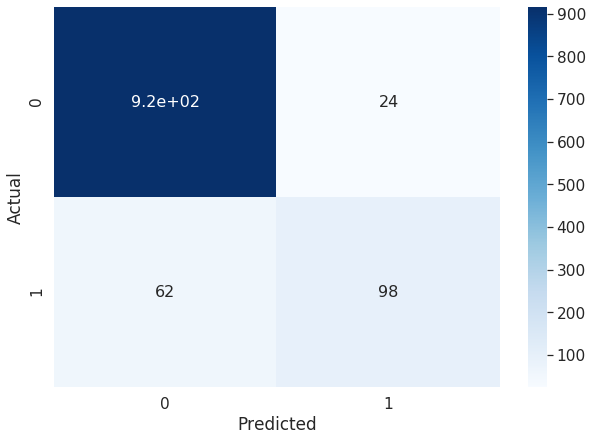

In [25]:
import seaborn as sn


df_cm = pd.DataFrame(confusion_mlp, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})